In [1]:
import pandas as pd
import re
import sys
import os
import numpy as np
import pickle
import time

In [3]:
print("Parsing Bible...")

book_list = os.listdir("kjv")
book_list = sorted(book_list)

Bible = []

for bookname in book_list:
    
    print(bookname)
    
    book_num = bookname[:2]
    
    with open("kjv/" + bookname) as f:
        f_input = f.read()
    spl = re.split(r"(\{[0-9]+\:[0-9]+\})", f_input)
#     book = []
    book_title = spl.pop(0).strip()
    
    
    while(spl):
        
        num = spl.pop(0)
        text = spl.pop(0)
    #     book.verses.append((num.strip(), verse.strip()))
        chapter, paragraph = num.strip()[1:-1].split(":")

        if int(chapter) > 99: 
            chapter = str(chapter)
        elif int(chapter) > 9:
            chapter = "0{}".format(chapter)
        else:
            chapter = "00{}".format(chapter)

        if int(paragraph) > 99: 
            paragraph = "{}".format(paragraph)
        elif int(paragraph) > 9:
            paragraph = "0{}".format(paragraph)
        else:
            paragraph = "00{}".format(paragraph)

        Bible.append({
            "book": book_num,
            "chapter": chapter,
            "paragraph": paragraph,
            "short_name": bookname[3:-4],
            "text": re.sub("\s+", " ", text.strip())
        })
        
Bible = pd.DataFrame(Bible)

NT = Bible[(Bible.book.astype(int) >= 40) & (Bible.book.astype(int) <= 66)]

print("Done.")

Parsing Bible...
01-Genesis.txt
02-Exodus.txt
03-Lev.txt
04-Num.txt
05-Deut.txt
06-Joshua.txt
07-Judges.txt
08-Ruth.txt
09-1Sam.txt
10-2Sam.txt
11-1Kings.txt
12-2Kings.txt
13-1Chron.txt
14-2Chron.txt
15-Ezra.txt
16-Nehemiah.txt
17-Esther.txt
18-Job.txt
19-Psalms.txt
20-Proverbs.txt
21-Eccl.txt
22-Song.txt
23-Isaiah.txt
24-Jeremiah.txt
25-Lament.txt
26-Ezekiel.txt
27-Daniel.txt
28-Hosea.txt
29-Joel.txt
30-Amos.txt
31-Obadiah.txt
32-Jonah.txt
33-Micah.txt
34-Nahum.txt
35-Habakkuk.txt
36-Zeph.txt
37-Haggai.txt
38-Zech.txt
39-Malachi.txt
40-Matthew.txt
41-Mark.txt
42-Luke.txt
43-John.txt
44-Acts.txt
45-Romans.txt
46-1Cor.txt
47-2Cor.txt
48-Gal.txt
49-Eph.txt
50-Philip.txt
51-Col.txt
52-1Thes.txt
53-2Thes.txt
54-1Tim.txt
55-2Tim.txt
56-Titus.txt
57-Philemon.txt
58-Hebrews.txt
59-James.txt
60-1Peter.txt
61-2Peter.txt
62-1John.txt
63-2John.txt
64-3John.txt
65-Jude.txt
66-Rev.txt
67-1Esdras.txt
68-2Esdras.txt
69-Tobit.txt
70-Judith.txt
71-GkEsther.txt
72-Wisdom.txt
73-Sirach.txt
74-Baruch.txt


In [4]:
Bible.head()

,book,chapter,paragraph,short_name,text
0,01,001,001,Genesis,In the beginning God created the heaven and th...
1,01,001,002,Genesis,"And the earth was without form, and void; and ..."
2,01,001,003,Genesis,"And God said, Let there be light: and there wa..."
3,01,001,004,Genesis,"And God saw the light, that [it was] good: and..."
4,01,001,005,Genesis,"And God called the light Day, and the darkness..."


In [5]:
NT.head()

,book,chapter,paragraph,short_name,text
23145,40,001,001,Matthew,"The book of the generation of Jesus Christ, th..."
23146,40,001,002,Matthew,Abraham begat Isaac; and Isaac begat Jacob; an...
23147,40,001,003,Matthew,And Judas begat Phares and Zara of Thamar; and...
23148,40,001,004,Matthew,And Aram begat Aminadab; and Aminadab begat Na...
23149,40,001,005,Matthew,And Salmon begat Booz of Rachab; and Booz bega...


In [6]:
def get_books(text_df):
    books = []
    for book_n in text_df.book.unique():
        book = text_df[text_df.book == book_n]
        text = ""
        for idx, paragraph in book.iterrows():
            text += " " + paragraph['text']
        books.append({
            "book": book_n,
            "text": text
        })
    books = pd.DataFrame(books)
    return books

def get_chapters(text_df):
    chapters = []
    for book_n in text_df.book.unique():
        book = text_df[text_df.book == book_n]
        for chapter_n in book.chapter.unique():
            chapter = book[book.chapter == chapter_n]
            text = ""
            for idx, paragraph in chapter.iterrows():
                text += " " + paragraph['text']
            chapters.append({
                "book": book_n,
                "chapter": chapter_n,
                "text": text
            })
    chapters = pd.DataFrame(chapters)
    return chapters

def get_paragraphs(text_df):
    return text_df

***

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def kw_occ(keyword, df):
    keyword_occurences = []
    if type(keyword) == str: keyword = [keyword]
    for idx, row in df.iterrows():
        text = row['text']
        occ = 0
        for w in keyword:
            occ += len(re.findall(r"\b{}".format(w), text, re.IGNORECASE))
        keyword_occurences.append(occ)
    return keyword_occurences

In [10]:
def plot_kws(keywords, text, granularity, title, save=True):
        
    if granularity == "b":
        df = get_books(text)
    elif granularity == "c":
        df = get_chapters(text)
    elif granularity == "p":
        df = get_paragraphs(text)
        
    fig, ax = plt.subplots(1, 1, figsize=(17,7)) 
    for kw in keywords:
        occ = kw_occ(kw, df)
        ax.plot(list(range(len(occ))), occ, alpha=0.7)
        
    if granularity == "b":
        ax.set_ylabel("Mentions per book")
        ax.set_xlabel("Books")
    elif granularity == "c":
        ax.set_ylabel("Mentions per chapter")
        ax.set_xlabel("Chapters")
    elif granularity == "p":
        ax.set_ylabel("Mentions per paragraph")
        ax.set_xlabel("Paragraphs")
        
    ax.set_xticks(range(len(df)))
    ax.set_xticklabels(df.book, size='small')
    ax.set_xlim([0,80])
    
    legend = []
    for kw in keywords:
        if type(kw) == str:
            legend.append(kw)
        else:
            legend.append(" OR ".join(kw))
    ax.legend(legend)
    ax.set_title(title)
    plt.tight_layout()
    
    if save:
        plt.savefig("img/" + re.sub(" ","_",title))

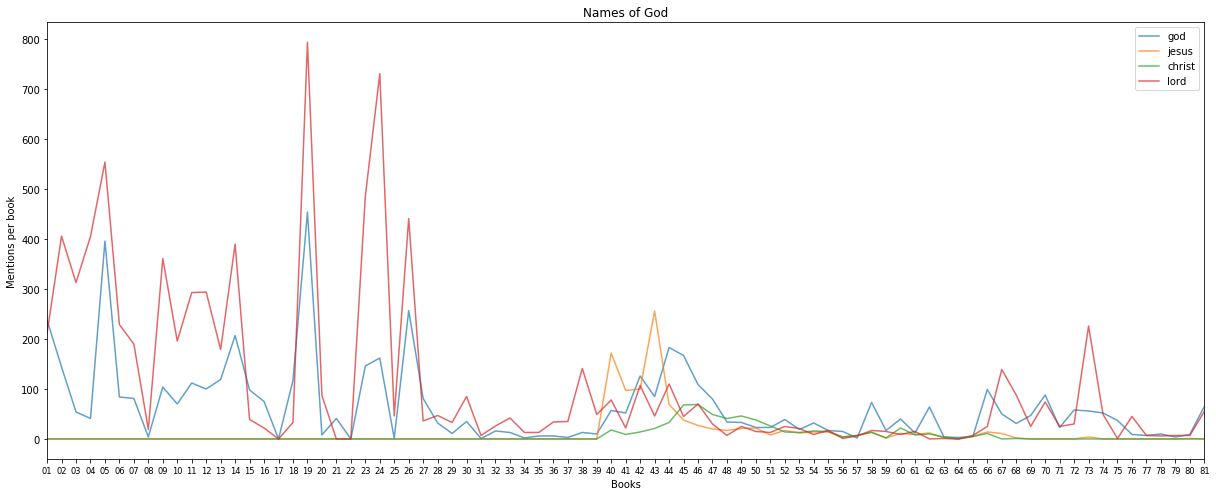

In [310]:
keywords = ["god", "jesus", "christ", "lord"]
plot_kws(keywords, Bible, "b", "Names of God")

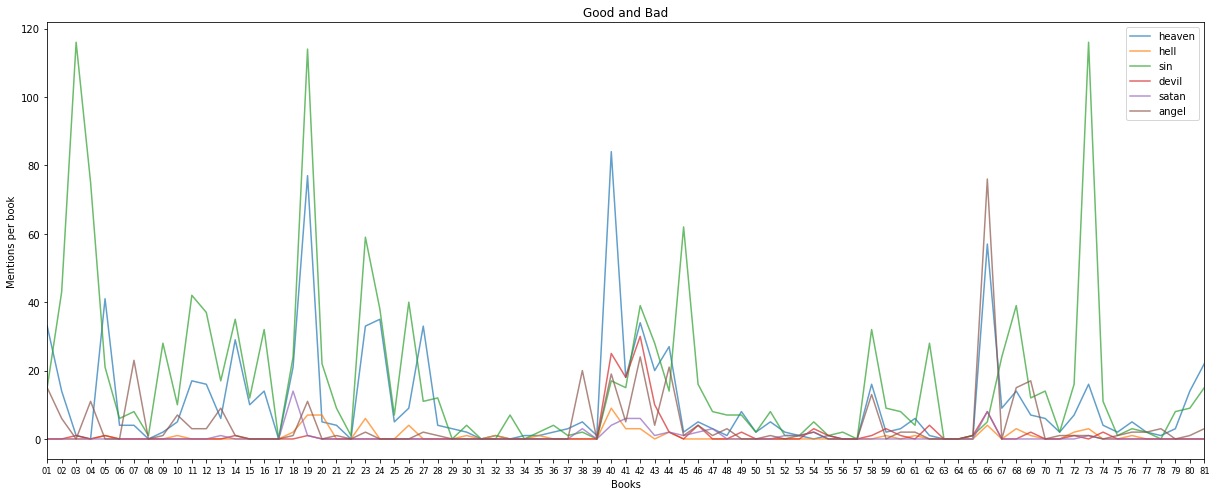

In [311]:
keywords = ["heaven", "hell", "sin", "devil", "satan","angel"]
plot_kws(keywords, Bible, "b", "Good and Bad")

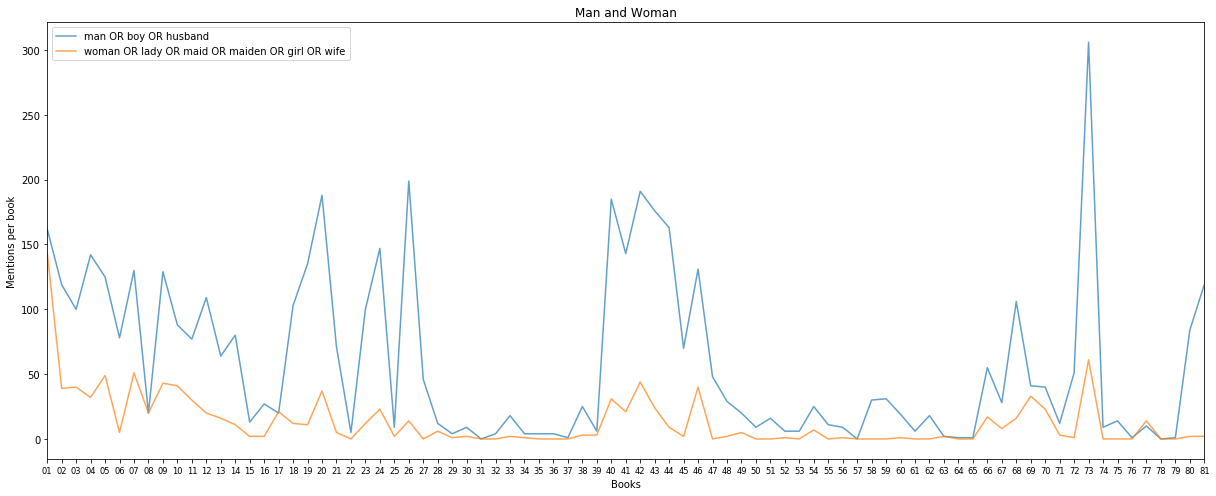

In [312]:
keywords = [["man","boy","husband"], ["woman","lady","maid","maiden","girl","wife"]]
plot_kws(keywords, Bible, "b", "Man and Woman")

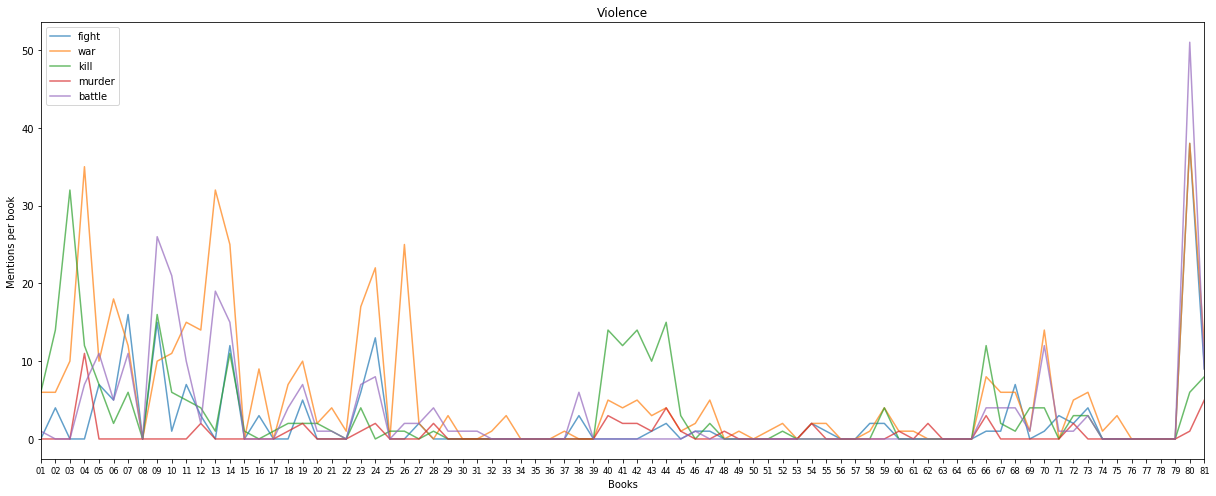

In [314]:
keywords = ["fight", "war", "kill", "murder", "battle"]
plot_kws(keywords, Bible, "b", "Violence")

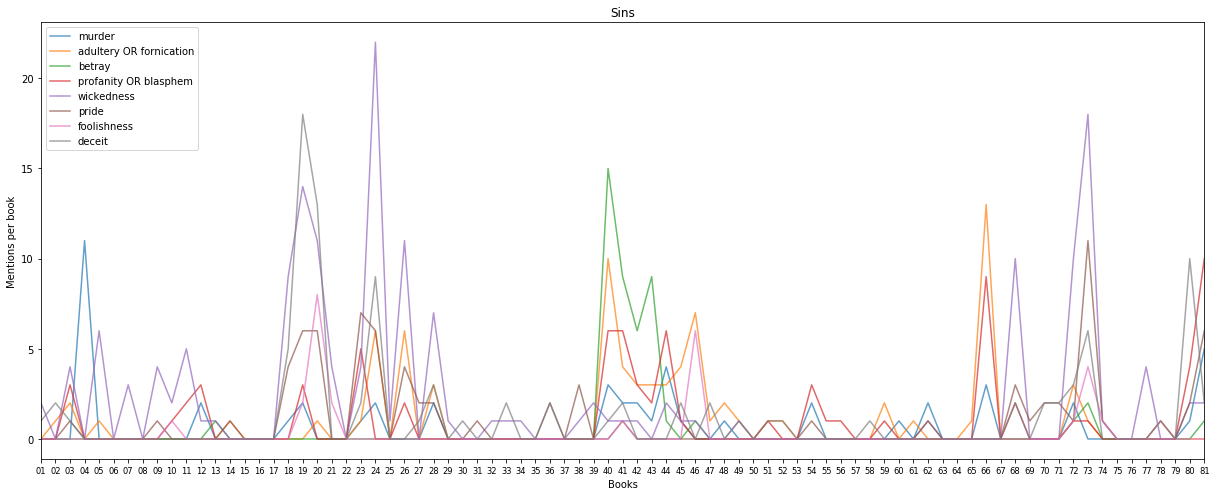

In [315]:
keywords = ["murder",["adultery","fornication"],"betray",["profanity","blasphem"],"wickedness","pride","foolishness","deceit"]
plot_kws(keywords, Bible, "b", "Sins")

# Gospel analysis

In [254]:
Matthew = Bible[Bible.book == "40"]
Mark = Bible[Bible.book == "41"]
Luke = Bible[Bible.book == "42"]
John = Bible[Bible.book == "43"]

In [304]:
def plot_kws_gospel(keywords, granularity, title, save=True):
        
    if granularity == "b":
        df_matthew = get_books(Matthew)
        df_mark = get_books(Mark)
        df_luke = get_books(Luke)
        df_john = get_books(John)
    elif granularity == "c":
        df_matthew = get_chapters(Matthew)
        df_mark = get_chapters(Mark)
        df_luke = get_chapters(Luke)
        df_john = get_chapters(John)
    elif granularity == "p":
        df_matthew = get_paragraphs(Matthew)
        df_mark = get_paragraphs(Mark)
        df_luke = get_paragraphs(Luke)
        df_john = get_paragraphs(John)
        
    gospel = {
        "Matthew": df_matthew,
        "Mark": df_mark,
        "Luke": df_luke,
        "John": df_john
    }
        
    fig, axes = plt.subplots(4, 1, figsize=(17,8)) 
    count = 0
    limits = [0,0,0,0]
    for apostle in gospel:
        df = gospel[apostle]
        for kw in keywords:
            occ = kw_occ(kw, df)
            limits[count] = max(limits[count], max(occ))
            axes[count].plot(list(range(len(occ))), occ, alpha=0.5)
        if granularity == "b":
            axes[count].set_ylabel("Mentions per book")
#             axes[count].set_xlabel("Books")
            axes[count].set_xticks([])
            axes[count].set_xlim([0, len(df)-1])
#             axes[count].set_xticklabels(df.book, size='small')
        elif granularity == "c":
            axes[count].set_ylabel("Mentions per chapter")
#             axes[count].set_xlabel("Chapters")
            axes[count].set_xticks([])
            axes[count].set_xlim([0, len(df)-1])
#             axes[count].set_xticklabels(df.chapter, size='small')
        elif granularity == "p":
            axes[count].set_ylabel("Mentions per paragraph")
#             axes[count].set_xlabel("Chapters")
            axes[count].set_xticks([])
            axes[count].set_xlim([0, len(df)-1])
#             axes[count].set_xticklabels(df.paragraph, size='small')
        
        legend = []
        for kw in keywords:
            if type(kw) == str:
                legend.append(kw)
            else:
                legend.append(" OR ".join(kw))
        axes[count].legend(legend)
        axes[count].set_title(apostle)
        count += 1
    for ax in axes:
        ax.set_ylim([0, max(limits)+1])
#     fig.suptitle(title, fontsize=28)
    plt.tight_layout()
    
    if save:
        plt.savefig("img/" + re.sub(" ","_",title))

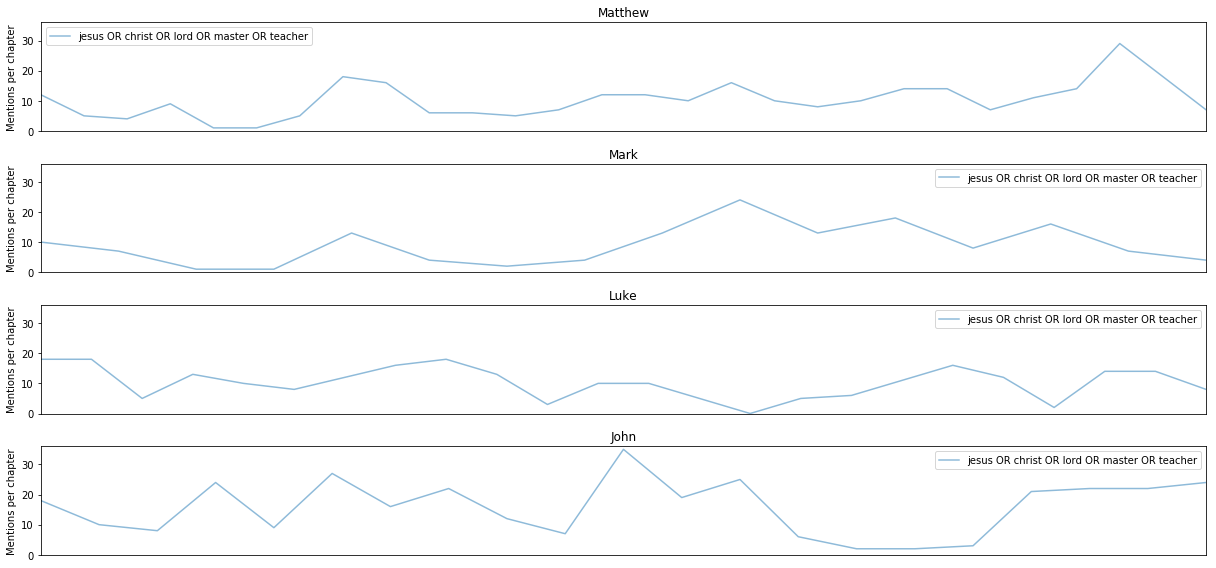

In [308]:
keywords = [["jesus", "christ","lord","master","teacher"]]
plot_kws_gospel(keywords, "c", "Jesus in Gospel")

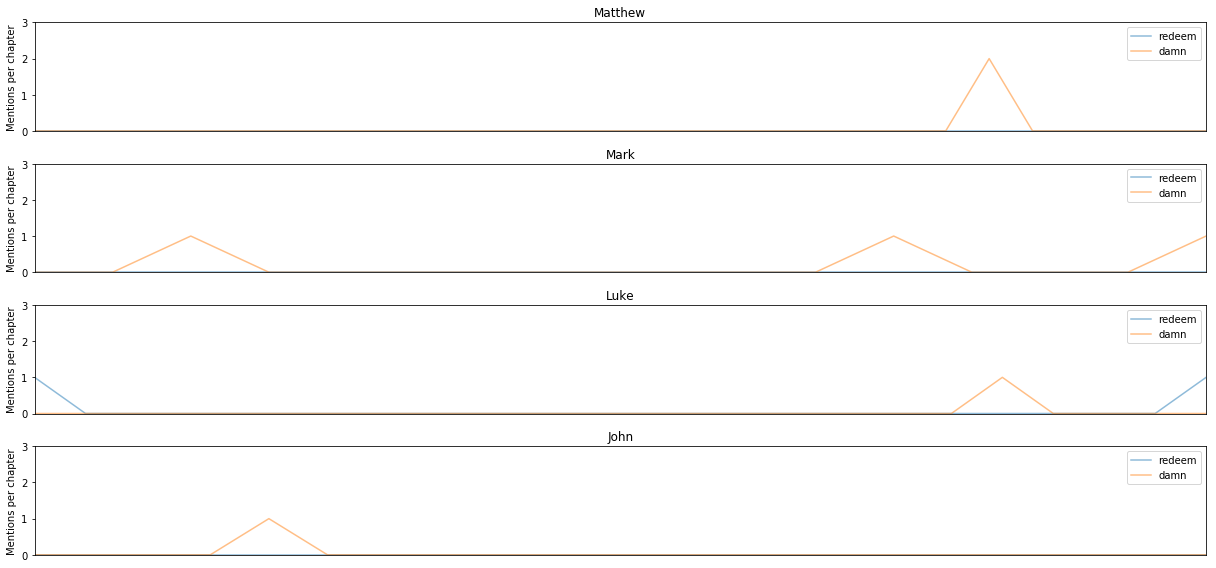

In [307]:
keywords = ["redeem", "damn"]
plot_kws_gospel(keywords, "c", "Jesus in Gospel", save=False)

***

# Words associated with God

In [38]:
import spacy
from collections import defaultdict, OrderedDict

In [82]:
stops = []
with open("stop.txt",'r') as f:
    for line in f:
        stops.append(line.strip())

In [14]:
nlp = spacy.load('en_core_web_lg')

In [20]:
paragraphs = []
for p in nlp.pipe(Bible.text, batch_size=1000):
    paragraphs.append(p)

In [21]:
Bible['spacy_docs'] = paragraphs

In [22]:
Bible.head()

,book,chapter,paragraph,short_name,text,spacy_docs
0,01,001,001,Genesis,In the beginning God created the heaven and th...,"(In, the, beginning, God, created, the, heaven..."
1,01,001,002,Genesis,"And the earth was without form, and void; and ...","(And, the, earth, was, without, form, ,, and, ..."
2,01,001,003,Genesis,"And God said, Let there be light: and there wa...","(And, God, said, ,, Let, there, be, light, :, ..."
3,01,001,004,Genesis,"And God saw the light, that [it was] good: and...","(And, God, saw, the, light, ,, that, [, it, wa..."
4,01,001,005,Genesis,"And God called the light Day, and the darkness...","(And, God, called, the, light, Day, ,, and, th..."


In [30]:
type(next(Bible.iloc[0]["spacy_docs"].sents))

spacy.tokens.span.Span

In [100]:
keyword = "god"
tokens = {
    book_n: defaultdict(int) for book_n in Bible.book.unique()
}
sentiments = {
    book_n: [] for book_n in Bible.book.unique()
}

for idx, row in Bible.iterrows():
    book_n = row['book']
    doc = row['spacy_docs']
    for sent in doc.sents:
        if len(re.findall(r"\b{}\b".format(keyword), sent.text, re.IGNORECASE)) > 0:
            sentiments[book_n].append(sent.sentiment)
            for token in sent:
                if (not token.is_punct 
                    and not token.is_stop 
                    and token.lemma_ not in stops 
                    and token.lemma_ not in ["-PRON-","'s","thou","thee","thy","ye","hath","saith"]):
                    tokens[book_n][token.lemma_] += 1
                
for key in tokens.keys():
    tokens[key] = list(OrderedDict(sorted(tokens[key].items(), key=lambda x: x[1], reverse=True)).items())
for key in sentiments.keys():
    if len(sentiments[key]) > 0:
        sentiments[key] = np.mean(sentiments[key])
    else:
        sentiments[key] = 0

In [104]:
tokens['73'][:15]

[('god', 40),
 ('lord', 14),
 ('man', 10),
 ('most', 6),
 ('high', 6),
 ('thing', 5),
 ('fear', 4),
 ('heart', 4),
 ('one', 4),
 ('give', 4),
 ('name', 4),
 ('wisdom', 3),
 ('both', 3),
 ('love', 3),
 ('turn', 3)]

In [101]:
sentiments

{'01': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
